### 2021 Spring "EE479: Scientific Computing & Data"
#### Yong-Hoon Kim, KAIST Electrical Engineering
#### Kutz 2.3 Gradient (Steepest) Descent for Ax=b
##### Writer: Yumin Song

###### 2021. 04. 28 revised 

In this section, the gradient descent, or steepest descent, algorithm will be introduced. It illustrates how to solve the linear problem Ax = b. To begin, we will consider the concept of the quadratic form

$ f(x) = \frac{1}{2}x^TAx - b^Tx + c $

where A is a matrix, b and x are vectors, and c is a scalar constant.

The gradient of the quadratic form is defined as

$\triangledown f(x)=$ $\left[\begin{array}{rrr} 
\frac{\partial}{\partial{x_1}}f(x)\\
\frac{\partial}{\partial{x_2}}f(x)\\
\vdots \quad \\
\frac{\partial}{\partial{x_n}}f(x)\\
\end{array}\right]$

Consider the following illustrative example system that is both positive definite and symmetric 

$A = $ $\left[\begin{array}{rrr} 
3&2\\
2&6\\
\end{array}\right]$, 
$b = $ $\left[\begin{array}{rrr} 
2\\
-8\\
\end{array}\right]$, $c =0$ 

First, we calculate the quadratic form for this case with gradient 

$\triangledown f(x)=$ $\left[\begin{array}{rrr} 
3x_1+2x_2-2\\
2x_1+6x_2+8\\
\end{array}\right]$

An initial guess point is given and the gradient($\triangledown f(x)$) is caluated 
This gives the steepest descent towards the minimum point of $f(x)$. 
Gradient direction does not mean the mininum point, but rather gives the steepest path for minimizing $f(x)$.
The algorithm of equation is as follows:

$ \xi(\tau) = x-\tau\triangledown f(x) $

where the parameter τ dictates how far to move along the gradient descent curve. 
In gradient descent, it is important for the algorithm to always determine when to reach the minimum point in an optimal way. To do this, the algorithm must determine the correct value of 𝜏.

To compute the value of $ \tau $ , consider the construction of a new function

$ F(\tau) = f( \xi(\tau) )  $
$ \frac{\partial{F}}{\partial{\tau}} = -\triangledown f(\xi)\triangledown f(x) = 0  $

which must be minimized now as a function of $\tau$ . This is accomplished by computing $dF/dτ = 0$.




Optimization terminated successfully.
         Current function value: -8.596457
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: -9.740788
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -9.952107
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: -9.991134
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -9.998359
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: -9.999697
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -9.999944
         Iterations: 11
         Function evaluations: 22
Optimization terminated suc

<ipython-input-3-45a2ccfa0c56>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-45a2ccfa0c56>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-45a2ccfa0c56>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


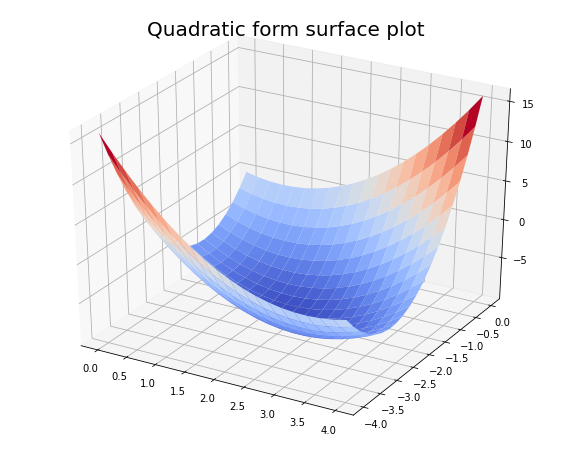

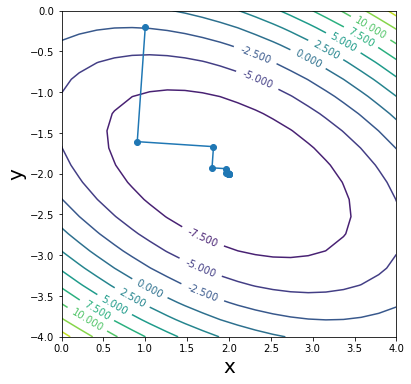

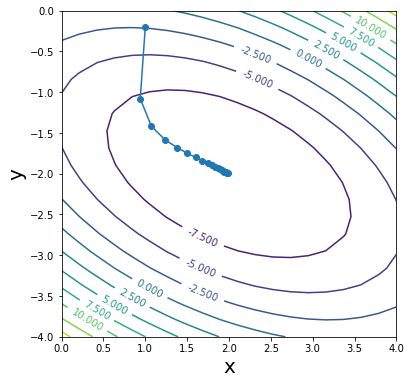

In [3]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import cm

A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  # we will use the convention that a vector is a column vector
c = 0.0

def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(0, 4, size))
    x2 = list(np.linspace(-4, 0, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    plt.title('Quadratic form surface plot',fontsize=20)
    fig.show()
    return x1, x2, zs

x1, x2, zs = bowl(A, b, c)
def contoursteps(x1, x2, zs, text,steps=None,):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
     #   plt.title('Initial tau=%f'% text,fontsize=20)
        plt.xlabel('x',fontsize=20)
        plt.ylabel('y',fontsize=20)
    fig.show()

x = np.matrix([[-2.0],[-2.0]])

steps = [(1.0, -0.2)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta

n=128
x= np.zeros(n)
x[0] = 1
y= np.zeros(n)
y[0] = -0.2
f = np.zeros(30)
f[0] = 1.5*x[0]**2 + 2*x[0]*y[0] + 3*y[0]**2 -2*x[0] + 8*y[0]
tau_init= np.zeros(n)

def tausearch(tau,x,y):
    x0 = x - tau*(3*x+2*y-2)
    y0 = y - tau*(2*x+6*y+8)
    mintau = 1.5*x0**2 +2*x0*y0 +3*y0**2 -2*x0 +8*y0
    return mintau

steps=[]
steps.append((x[0],y[0]))
for j in range(20):
    tau = optimize.fmin(tausearch,(0.2),(x[j],y[j]))
    x[j+1]= x[j] - tau*(3*x[j]+2*y[j]-2)
    y[j+1]= y[j] - tau*(2*x[j]+6*y[j]+8)
    f[j+1] = 1.5*x[j+1]**2 + 2*x[j+1]*y[j+1] + 3*y[j+1]**2 -2*x[j+1] + 8*y[j+1]
    steps.append((x[j+1],y[j+1]))
    if abs(f[j+1]-f[j]) < 10**(-6):
      break
contoursteps(x1, x2, zs, float(0.2),steps)

steps=[]
steps.append((x[0],y[0]))
for j in range(20):
    tau = 0.1
    x[j+1]= x[j] - tau*(3*x[j]+2*y[j]-2)
    y[j+1]= y[j] - tau*(2*x[j]+6*y[j]+8)
    f[j+1] = 1.5*x[j+1]**2 + 2*x[j+1]*y[j+1] + 3*y[j+1]**2 -2*x[j+1] + 8*y[j+1]
    steps.append((x[j+1],y[j+1]))
    if abs(f[j+1]-f[j]) < 10**(-6):
      break
contoursteps(x1, x2, zs, float(0.1),steps)

In first example, we use scipy optimize code for search optimal tau. we can see the value finding using downhill property of gradient descent. In seceond example fixed tau ,namely, not used optimal tau, is used.  It can also find final value, but much slow in this case.